In [1]:
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

import numpy as np
import pandas as pd

In [2]:
scipy.random.seed(42)
n = 100
X1 = scipy.random.normal(1,2,n)
X2 = scipy.random.normal(-2,4,n)
X = np.column_stack([X1, X2])
noise = scipy.random.normal(0,1,n)
Y = 3*X1 - 10*X2 + 5*noise

## Exploratory plotting

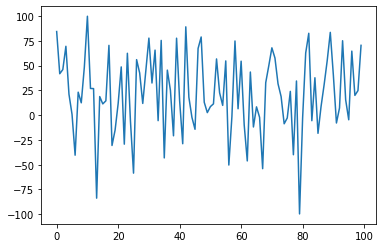

In [3]:
plt.plot(range(n), Y)

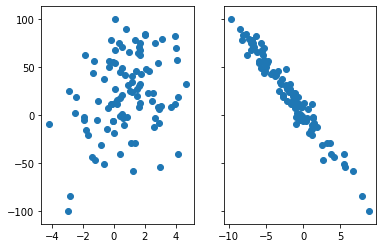

In [4]:
fig, ax = plt.subplots(1,2, sharey=True)
ax[0].scatter(X1, Y)
ax[1].scatter(X2, Y)

In [5]:
data_df = pd.DataFrame([X1, X2, Y]).T

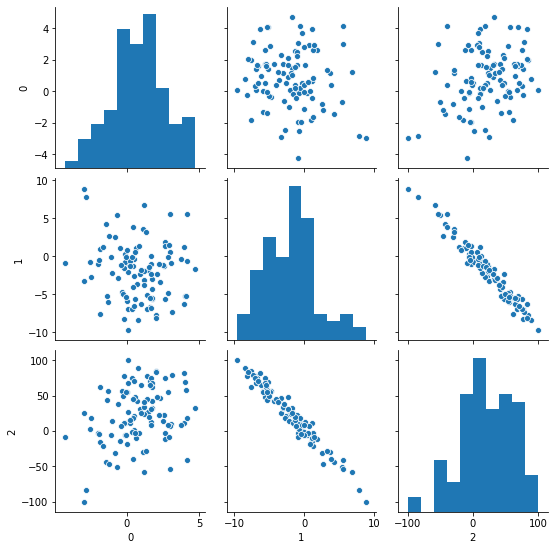

In [6]:
sns.pairplot(data_df)

## Model Fitting

In [ ]:

X_ext = sm.add_constant(X)
sm_mod = sm.OLS(Y, X_ext)
sm_res = sm_mod.fit()
sm_res.summary()

In [7]:
X_ext = sm.add_constant(X)
X_ext[0:3, :]

array([[ 1.        ,  1.99342831, -7.66148297],
       [ 1.        ,  0.7234714 , -3.68258129],
       [ 1.        ,  2.29537708, -3.37085807]])

In [8]:
sm_mod = sm.OLS(Y, X_ext)

In [9]:
sm_res = sm_mod.fit()

In [10]:
sm_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     2687.
Date:                Wed, 08 Jul 2020   Prob (F-statistic):           1.15e-85
Time:                        08:10:01   Log-Likelihood:                -308.57
No. Observations:                 100   AIC:                             623.1
Df Residuals:                      97   BIC:                             630.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1527      0.634     -0.241      0.810      -1.412       1.107
x1             3.5652      0.300     11.873      0.000       2.969       4.161
x2           -10.0153      0.143    -70.049      0.000     -10.299      -9.732
==============================================================================
Omnibus:                        3.125   Durbin-Watson:                   2.220
Prob(Omnibus):                  0.210   Jarque-Bera (JB):                3.080
Skew:                           0.108   Prob(JB):                        0.214
Kurtosis:                       3.832   Cond. No.                         5.19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
sm_res.predict(X_ext)

array([ 83.68674786,  39.30899088,  41.79116986,  66.44346444,
        28.234954  ,   5.58690577, -40.85948109,  21.92156712,
         9.77785616,  30.29434532,  97.0074984 ,  21.18456467,
        22.75563692, -88.88018753,  18.85005495,   7.35347821,
        17.61190646,  72.50282677, -28.81443749, -16.75059094,
         2.20413949,  58.26467739, -32.27313175,  69.44424577,
        -3.94875601, -63.5185127 ,  54.91840085,  48.80880885,
        15.16824954,  41.53326806,  81.27452936,  33.90408681,
        65.90435901,  -3.07147633,  66.14176333, -47.35443454,
        56.31074495,  22.3721498 , -18.61794216,  74.15707984,
        19.59648029, -27.70077188,  87.01662239,  13.8995516 ,
         2.48945656, -13.01047367,  69.71264039,  83.88031647,
         4.98369389,  -1.0256377 ,  15.71901665,   6.81823993,
        45.85921847,  18.5003641 ,  19.05384178,  58.70159312,
       -57.28626148,   2.25601843,  73.53056638,   4.09686987,
        59.07361351,  -9.41228655, -30.86036158,  47.79

In [12]:
sm_res.resid

array([  0.69730354,   2.49115886,   4.21879825,   3.05481573,
        -7.07679262,  -4.84288698,   0.46249827,   1.26885849,
         2.67852033,  18.20250902,   2.81729661,   5.75944002,
         4.05693713,   5.12777782,  -0.08146958,   4.00574903,
        -3.16454847,  -2.0543143 ,  -1.77343728,   1.60881812,
         9.52176808,  -9.58016297,   2.9978295 ,  -6.98227173,
        -2.15148341,   5.0105762 ,   1.11849079,  -6.29143545,
        -3.33465483,   3.25358435,  -3.51006495,  -1.45064375,
        -0.26533461,  -2.47648821,   9.29019596,   4.20159156,
       -10.85314462,   2.68456168,  -2.20079515,   3.52082691,
        -5.22668189,  -1.13041081,   2.11375369,   4.23724786,
        -4.75738231,  -1.25401263,  -2.37317113,  -4.98596475,
         8.02762442,   3.59291839,  -7.09864661,   4.60264774,
        10.89101938,   4.04187205,  -9.18759341,  -3.96102605,
         6.95453164,  -3.60295685,   1.32825124,   2.36742682,
        -4.59604448,  -0.48267824, -15.32780812,  -4.26

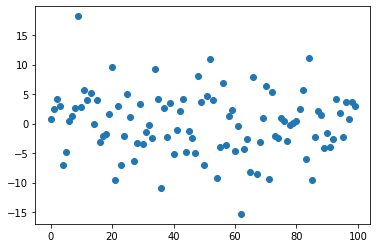

In [13]:
plt.plot(sm_res.resid, linestyle='', marker='o')

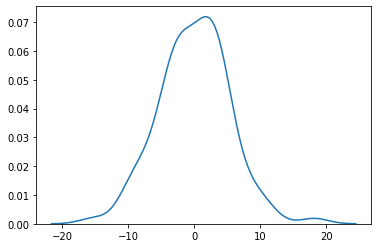

In [14]:
sns.kdeplot(sm_res.resid)

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
sk_model = LinearRegression()
sk_res =  sk_model.fit(X,Y)
sk_res.coef_, sk_res.intercept_, sk_res.score(X,Y)

(array([  3.56522341, -10.01534597]), -0.15267197951724754, 0.9822724831158827)

In [18]:
sk_res.predict(X)

array([ 83.68674786,  39.30899088,  41.79116986,  66.44346444,
        28.234954  ,   5.58690577, -40.85948109,  21.92156712,
         9.77785616,  30.29434532,  97.0074984 ,  21.18456467,
        22.75563692, -88.88018753,  18.85005495,   7.35347821,
        17.61190646,  72.50282677, -28.81443749, -16.75059094,
         2.20413949,  58.26467739, -32.27313175,  69.44424577,
        -3.94875601, -63.5185127 ,  54.91840085,  48.80880885,
        15.16824954,  41.53326806,  81.27452936,  33.90408681,
        65.90435901,  -3.07147633,  66.14176333, -47.35443454,
        56.31074495,  22.3721498 , -18.61794216,  74.15707984,
        19.59648029, -27.70077188,  87.01662239,  13.8995516 ,
         2.48945656, -13.01047367,  69.71264039,  83.88031647,
         4.98369389,  -1.0256377 ,  15.71901665,   6.81823993,
        45.85921847,  18.5003641 ,  19.05384178,  58.70159312,
       -57.28626148,   2.25601843,  73.53056638,   4.09686987,
        59.07361351,  -9.41228655, -30.86036158,  47.79

* Stats models seem superior in every way
    - has a summary
    - can get residuals straight up
    - can do anything sklearn does too

## Fittig via RSS minimization

In [19]:
from scipy import optimize

In [26]:
def rss(x):
    resid = Y-X_ext.dot(np.array(x))
    return resid.dot(resid)

In [28]:
res_optim = optimize.minimize(rss, [0,1,2])

In [30]:
res_optim.fun, res_optim.hess_inv

(2803.4748591320454,
 array([[0.00042923, 0.00078634, 0.00022925],
        [0.00078634, 0.01169863, 0.00175411],
        [0.00022925, 0.00175411, 0.00045467]]))

In [32]:
res_optim

      fun: 2803.4748591320454
 hess_inv: array([[0.00042923, 0.00078634, 0.00022925],
       [0.00078634, 0.01169863, 0.00175411],
       [0.00022925, 0.00175411, 0.00045467]])
      jac: array([ 0.00000000e+00,  3.05175781e-05, -3.05175781e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 71
      nit: 10
     njev: 14
   status: 2
  success: False
        x: array([ -0.15267191,   3.56522339, -10.01534598])

In [33]:
type(res_optim)

scipy.optimize.optimize.OptimizeResult

In [36]:
res_optim.success

False

In [37]:
res_optim = optimize.minimize(rss, [0,1,2], tol=1e-3)

In [38]:
res_optim

      fun: 2803.4748591320476
 hess_inv: array([[ 0.00697449, -0.00104109,  0.00059702],
       [-0.00104109,  0.00156005,  0.0001015 ],
       [ 0.00059702,  0.0001015 ,  0.00035387]])
      jac: array([-3.05175781e-05, -6.10351562e-05, -6.10351562e-05])
  message: 'Optimization terminated successfully.'
     nfev: 55
      nit: 7
     njev: 11
   status: 0
  success: True
        x: array([ -0.1526721 ,   3.56522338, -10.01534601])